# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Installing required libraries

In [4]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Importing necessary libraries

In [5]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns
import random                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend
                                        # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/AIMLColab/Intro to Computer Vision/CNN-Project1/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/AIMLColab/Intro to Computer Vision/CNN-Project1/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [8]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

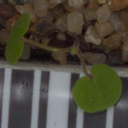

In [9]:
cv2_imshow(images[10])

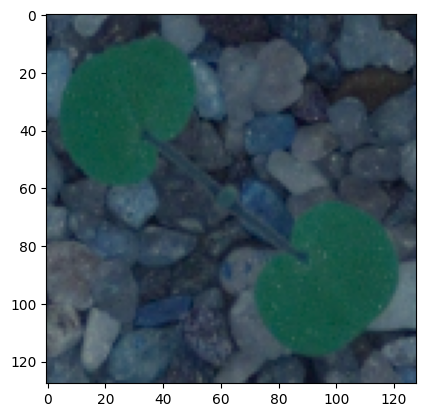

In [10]:
plt.imshow(images[15])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [11]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

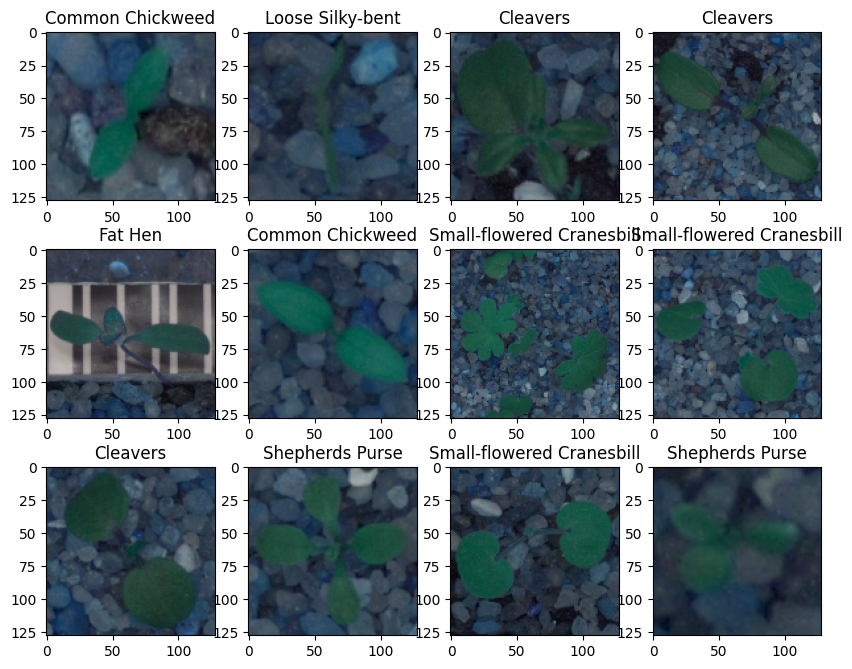

In [12]:
plot_images(images,labels)

### **Checking for data imbalance**

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

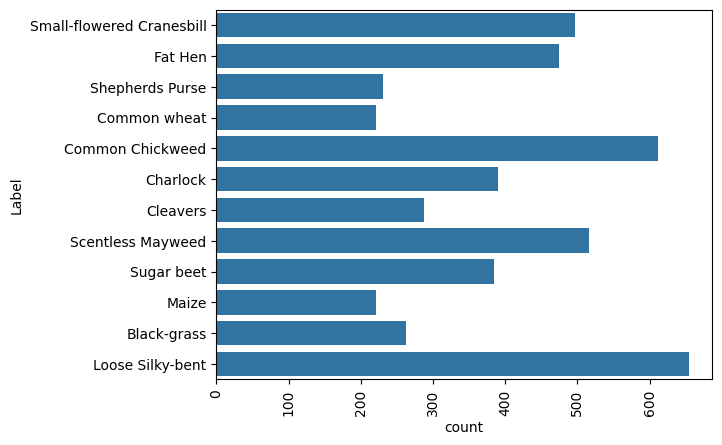

In [13]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

- As you can see from the above plot, the dataset is quite imbalanced.
- There are about
  - Shepered Purse, Common Wheat, Maize and Black-grass have around 200 images
  - Sugar beet and charlock have around 400 images
  - Cleavers around 300 and rest os plant seeds above 400 images

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [59]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [60]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

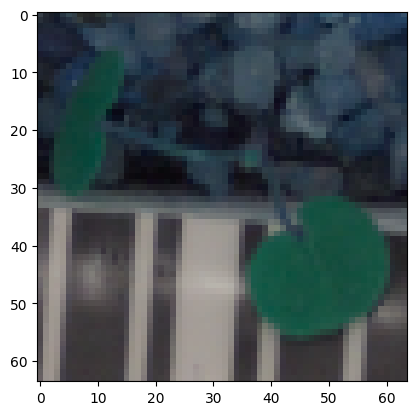

In [61]:
plt.imshow(images_decreased[10])

### Visualizing images using Gaussian Blur

In [62]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

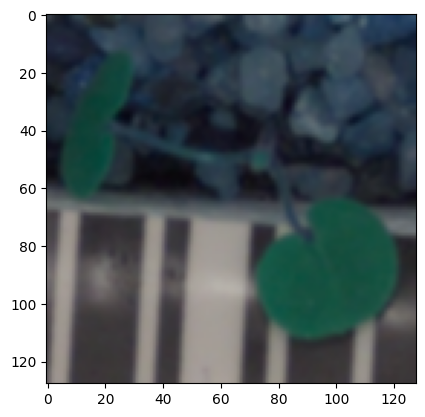

In [63]:
plt.imshow(images_gb[10])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [64]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [65]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 128, 128, 3) (3847, 1)
(428, 128, 128, 3) (428, 1)
(475, 128, 128, 3) (475, 1)


### Encode the target labels

- Convert labels from names to one hot vectors
- Normalizing the values

In [66]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [67]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

### Model - 1

* **Kernel_Size**: The kernel size here refers to the widthxheight of the filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7)
* **Padding**: The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
* **MaxPool2D**: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
* **Flatten**: Flattening is converting the data into a 1-dimensional array for giving them as input to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [68]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

In [69]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0

- There are **850016** trainable parameter

#### Fitting the model on the train data

**Early stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored.
- **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [70]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model1_history = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_normalized,y_val_encoded),
            verbose=2,callbacks=[es, mc]
)

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.36215, saving model to best_model.keras
61/61 - 5s - loss: 2.3564 - accuracy: 0.1843 - val_loss: 2.0248 - val_accuracy: 0.3621 - 5s/epoch - 77ms/step
Epoch 2/30

Epoch 2: val_accuracy improved from 0.36215 to 0.53271, saving model to best_model.keras
61/61 - 2s - loss: 1.8133 - accuracy: 0.3933 - val_loss: 1.4986 - val_accuracy: 0.5327 - 2s/epoch - 38ms/step
Epoch 3/30

Epoch 3: val_accuracy improved from 0.53271 to 0.57944, saving model to best_model.keras
61/61 - 2s - loss: 1.4142 - accuracy: 0.5157 - val_loss: 1.2976 - val_accuracy: 0.5794 - 2s/epoch - 37ms/step
Epoch 4/30

Epoch 4: val_accuracy improved from 0.57944 to 0.62383, saving model to best_model.keras
61/61 - 2s - loss: 1.2407 - accuracy: 0.5706 - val_loss: 1.1350 - val_accuracy: 0.6238 - 2s/epoch - 34ms/step
Epoch 5/30

Epoch 5: val_accuracy improved from 0.62383 to 0.64720, saving model to best_model.keras
61/61 - 2s - loss: 1.1624 - accuracy: 0.5963 - val_loss: 1

#### Model Evolution

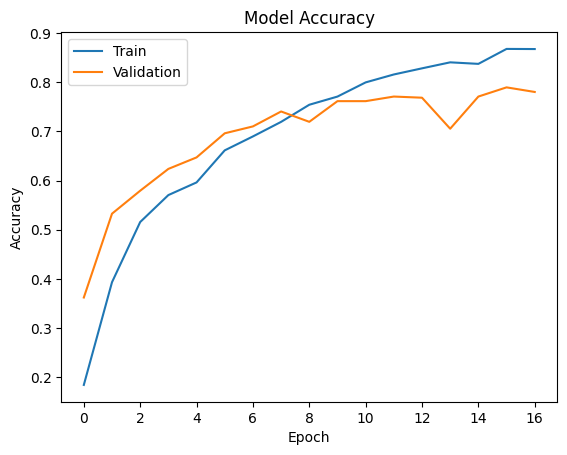

In [71]:
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Accuracy of the model is showing good progress, however Train and Validation data shows diverging after certain epoch


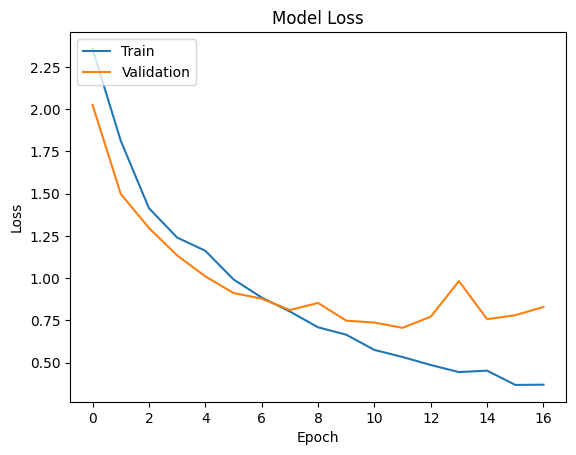

In [72]:
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Loss predectionis is reducing as with number of Epoch, but again Test and Validation is data is diverging

**Observations:**


*   We can see from the above plot that **the training accuracy and validation accuracy was good, same in case with loss predection too.**
*   The model seems to overfit on the data.

#### Generating the predictions using test data

In [73]:
# Here we would get the output as probablities for each category
model1_y_pred=model1.predict(X_test_normalized)
model1_y_pred_classes_ln = np.argmax(model1_y_pred,axis=1)
model1_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 8ms/step


In [74]:
# Test Accuracy
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(model1_y_test, model1_y_pred_classes_ln)

0.7705263157894737

* Model-1 provides an accuracy of 77%

#### Plotting the Confusion Matrix

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

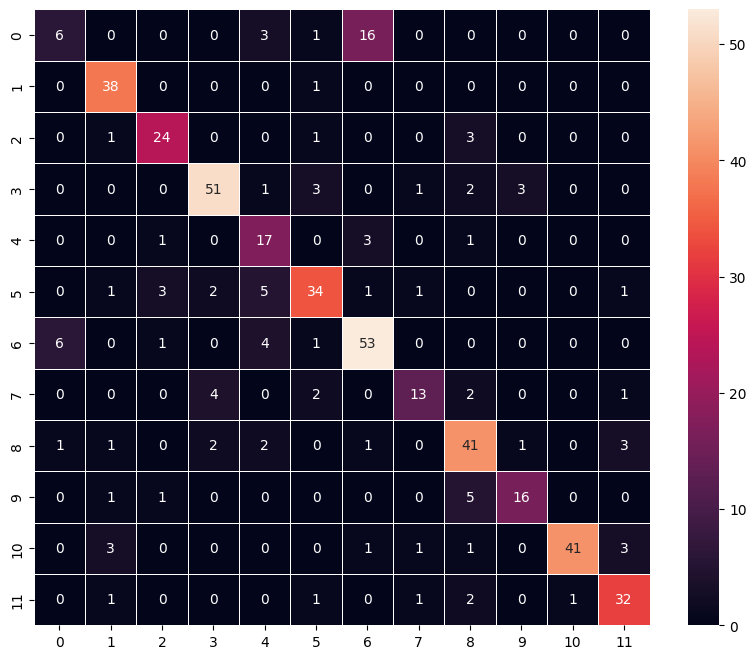

In [75]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(model1_y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly.
- We can also observe that classes 0, 4 and 6 are mostly misclassified.
- In comparison to the rest, other classeds are well classified.

### Model-2

#### Data Augumentation

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation to check if we can improve the model's performance.

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

Let's look at some examples of our augmented training data.

This is helpful for understanding the extent to which data is being manipulated prior to training, and can be compared with how the raw data looks prior to data augmentation.

In [76]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [77]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [78]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# The model is built automatically when it is compiled, or when it is first used.

model2.summary() # This line should now work without error.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0

In [79]:
# Epochs
epochs = 30
# Batch size
batch_size = 64
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model2_history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1, callbacks=[es, mc])

Epoch 1/30
60/60 [==============================] - ETA: 0s - loss: 2.2371 - accuracy: 0.2358
Epoch 1: val_accuracy improved from -inf to 0.40421, saving model to best_model.keras
60/60 [==============================] - 17s 247ms/step - loss: 2.2371 - accuracy: 0.2358 - val_loss: 1.8349 - val_accuracy: 0.4042
Epoch 2/30
60/60 [==============================] - ETA: 0s - loss: 1.7146 - accuracy: 0.4071
Epoch 2: val_accuracy improved from 0.40421 to 0.55607, saving model to best_model.keras
60/60 [==============================] - 15s 243ms/step - loss: 1.7146 - accuracy: 0.4071 - val_loss: 1.4137 - val_accuracy: 0.5561
Epoch 3/30
60/60 [==============================] - ETA: 0s - loss: 1.3858 - accuracy: 0.5133
Epoch 3: val_accuracy improved from 0.55607 to 0.62617, saving model to best_model.keras
60/60 [==============================] - 15s 244ms/step - loss: 1.3858 - accuracy: 0.5133 - val_loss: 1.1326 - val_accuracy: 0.6262
Epoch 4/30
60/60 [==============================] - ETA: 0

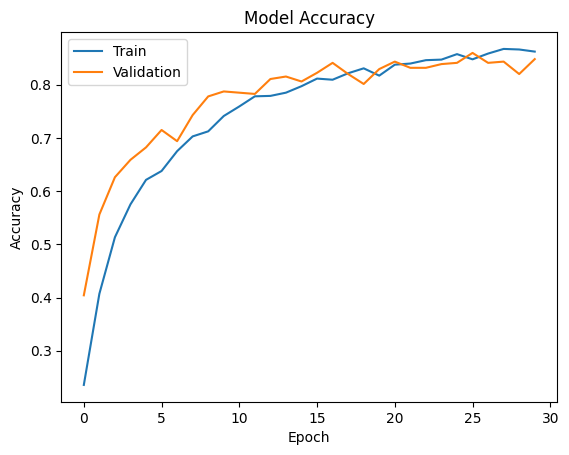

In [80]:
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Accuracy of the model is showing good progress, however Train and Validation data shows converging.
- Model-2 is promising on predection

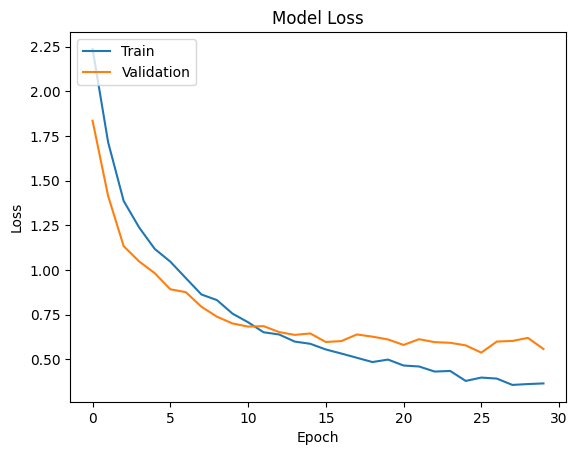

In [81]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Loss predection is also reducing but this Model perform better than Model1

#### Generating the predictions using test data

In [82]:
model2_y_pred = model2.predict(X_test_normalized)
model2_y_pred_classes_ln = np.argmax(model2_y_pred,axis=1)
model2_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 7ms/step


In [83]:
# Test Accuracy for Model2
accuracy_score(model2_y_test, model2_y_pred_classes_ln)

0.8357894736842105

- There is 84% accruacy in Model-2 and performing better than Model-1

#### Plotting Confusion Matrix

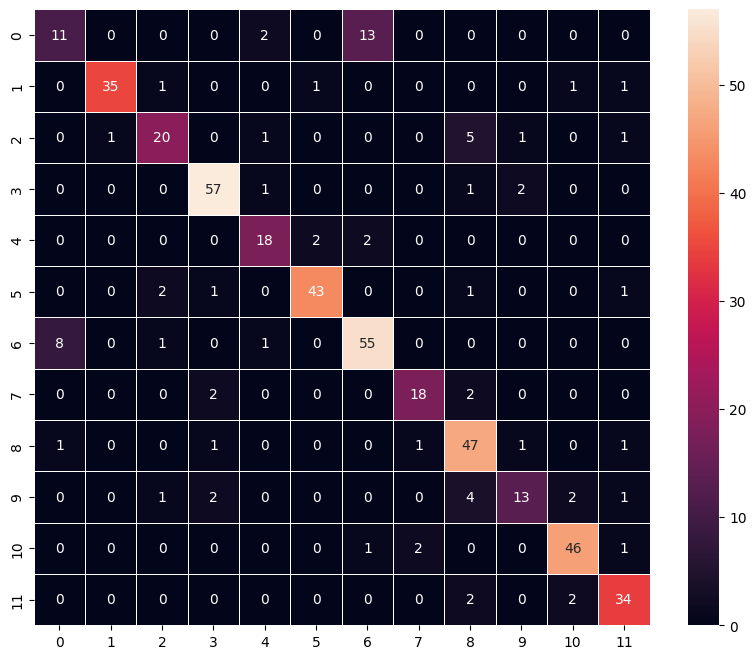

In [84]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(model2_y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to be really good.
- The 6th class is the most confused class among all and class 0 still shows misclassification
- We can observe that this model has performed well as compared to previous model.

### Model- 3 (Transfer Learning using VGG16)

In [85]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [86]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [87]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [88]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [89]:
model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model3.add(Flatten())

# Adding a dense output layer with 16 neurons
model3.add(Dense(100, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                612       
                                                                 
Total params: 15539650 (59.28 MB)
Trainable params: 8249

In [90]:
# Epochs
epochs = 30
# Batch size
batch_size = 64
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model3_vgg16_history = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                                epochs=epochs,
                                steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                validation_data=(X_val_normalized,y_val_encoded),
                                verbose=1, callbacks=[es, mc])

Epoch 1/30
60/60 [==============================] - ETA: 0s - loss: 2.2362 - accuracy: 0.2255
Epoch 1: val_accuracy improved from -inf to 0.35280, saving model to best_model.keras
60/60 [==============================] - 20s 296ms/step - loss: 2.2362 - accuracy: 0.2255 - val_loss: 1.9320 - val_accuracy: 0.3528
Epoch 2/30
60/60 [==============================] - ETA: 0s - loss: 1.8613 - accuracy: 0.3695
Epoch 2: val_accuracy improved from 0.35280 to 0.46495, saving model to best_model.keras
60/60 [==============================] - 16s 271ms/step - loss: 1.8613 - accuracy: 0.3695 - val_loss: 1.6281 - val_accuracy: 0.4650
Epoch 3/30
60/60 [==============================] - ETA: 0s - loss: 1.5698 - accuracy: 0.4592
Epoch 3: val_accuracy improved from 0.46495 to 0.50234, saving model to best_model.keras
60/60 [==============================] - 16s 272ms/step - loss: 1.5698 - accuracy: 0.4592 - val_loss: 1.4620 - val_accuracy: 0.5023
Epoch 4/30
60/60 [==============================] - ETA: 0

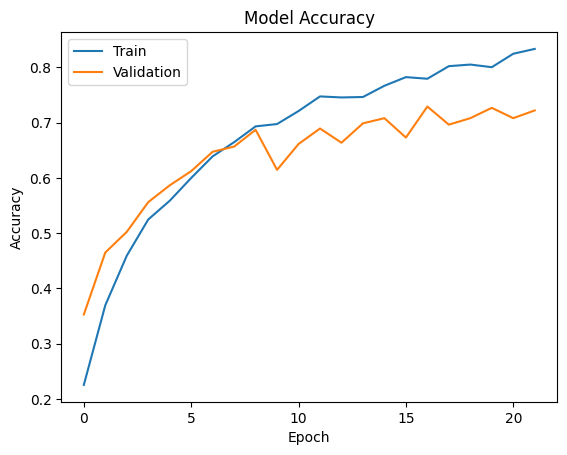

In [91]:
plt.plot(model3_vgg16_history.history['accuracy'])
plt.plot(model3_vgg16_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

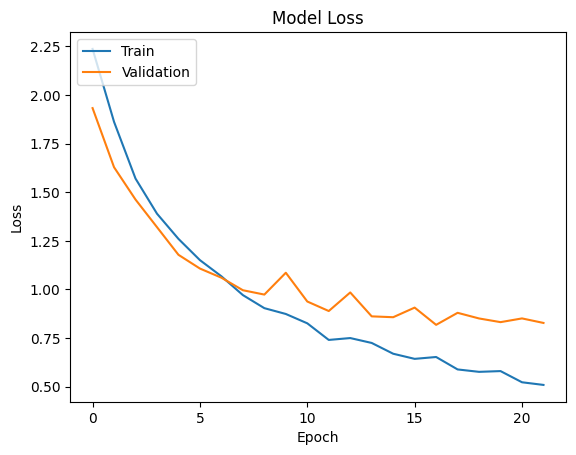

In [92]:
plt.plot(model3_vgg16_history.history['loss'])
plt.plot(model3_vgg16_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Generating the predictions using test data

In [93]:
# Here we would get the output as probablities for each category
model3_y_pred = model3.predict(X_test_normalized)
model3_y_pred_classes_ln = np.argmax(model3_y_pred,axis=1)
model3_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 1s 45ms/step


In [94]:
# Test Accuracy Model3
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(model3_y_test, model3_y_pred_classes_ln)

0.72

- Model-3 performed poor as compared to Model-1 and 2.
- Accuracy rate is just 72%

#### Plotting Confusion Matrix

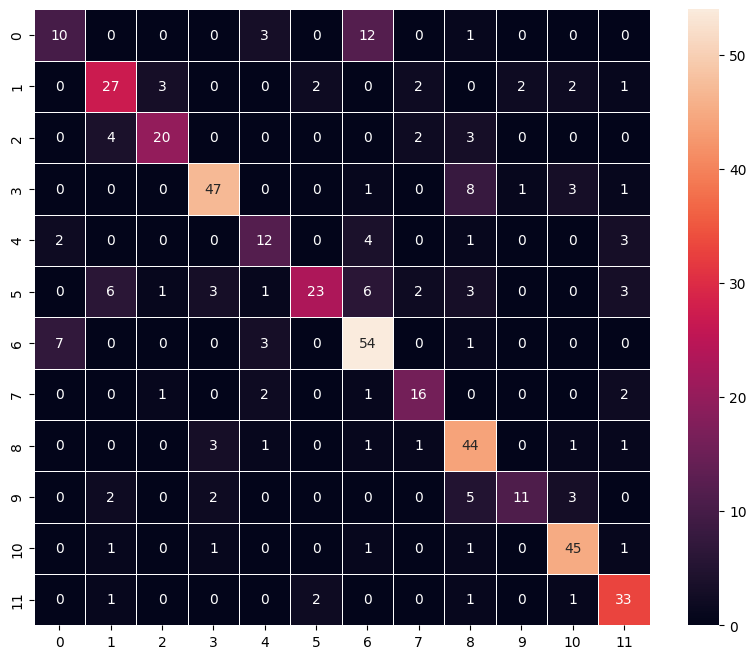

In [95]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(model3_y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- Confusion matricx indicates that, this model is not able to predict for lables 6 and 8 properly
- But predicts something else.

### Classification Report for each class



- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F1 score:** The F1 score is the harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.

#### **For ALL Models**

In [96]:
print("Model 1")
print(classification_report(model1_y_test, model1_y_pred_classes_ln))

Model 1
              precision    recall  f1-score   support

           0       0.46      0.23      0.31        26
           1       0.83      0.97      0.89        39
           2       0.80      0.83      0.81        29
           3       0.86      0.84      0.85        61
           4       0.53      0.77      0.63        22
           5       0.77      0.71      0.74        48
           6       0.71      0.82      0.76        65
           7       0.76      0.59      0.67        22
           8       0.72      0.79      0.75        52
           9       0.80      0.70      0.74        23
          10       0.98      0.82      0.89        50
          11       0.80      0.84      0.82        38

    accuracy                           0.77       475
   macro avg       0.75      0.74      0.74       475
weighted avg       0.77      0.77      0.77       475



In [97]:
print("Model 2")
print(classification_report(model2_y_test, model2_y_pred_classes_ln))

Model 2
              precision    recall  f1-score   support

           0       0.55      0.42      0.48        26
           1       0.97      0.90      0.93        39
           2       0.80      0.69      0.74        29
           3       0.90      0.93      0.92        61
           4       0.78      0.82      0.80        22
           5       0.93      0.90      0.91        48
           6       0.77      0.85      0.81        65
           7       0.86      0.82      0.84        22
           8       0.76      0.90      0.82        52
           9       0.76      0.57      0.65        23
          10       0.90      0.92      0.91        50
          11       0.85      0.89      0.87        38

    accuracy                           0.84       475
   macro avg       0.82      0.80      0.81       475
weighted avg       0.83      0.84      0.83       475



In [98]:
print("Model 3")
print(classification_report(model3_y_test, model3_y_pred_classes_ln))

Model 3
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        26
           1       0.66      0.69      0.68        39
           2       0.80      0.69      0.74        29
           3       0.84      0.77      0.80        61
           4       0.55      0.55      0.55        22
           5       0.85      0.48      0.61        48
           6       0.68      0.83      0.74        65
           7       0.70      0.73      0.71        22
           8       0.65      0.85      0.73        52
           9       0.79      0.48      0.59        23
          10       0.82      0.90      0.86        50
          11       0.73      0.87      0.80        38

    accuracy                           0.72       475
   macro avg       0.71      0.68      0.69       475
weighted avg       0.73      0.72      0.71       475



## Final Model

- Model-2 performed really well as compared to other model.
- We can run a test to visualize how each model predection works

#### **Model comparison**

### Visualizing the prediction

In [99]:
def visualize_predicted_images(model, images, predicted_labels, actual_labels):
  num_classes = 10  # Number of Classes

  # Get predictions for the predicted_labels (images)
  predicted_labels_decoded = enc.inverse_transform(model.predict(predicted_labels))
  predicted_keys = dict(enumerate(predicted_labels_decoded))  # Create a dictionary from predicted labels

  # Get the actual labels (not predictions)
  actual_labels_decoded = enc.inverse_transform(actual_labels)  # Use actual_labels directly
  actual_keys = dict(enumerate(actual_labels_decoded))  # Create a dictionary from actual labels

  rows = 3  # Defining number of rows=3
  cols = 4  # Defining number of columns=4
  fig = plt.figure(figsize=(40, 20))  # Defining the figure size to 10x8
  for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, len(predicted_labels))  # Generating random indices from the data and plotting the images
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)  # Adding subplots with 3 rows and 4 columns
      ax.imshow(images[random_index, :])  # Plotting the image
      ax.set_ylabel("Actual :" + actual_keys[random_index])  # Use actual label here
      ax.set_xlabel("Predicted : " + predicted_keys[random_index])
  plt.show()

#### Model-1 Predection

15/15 [==============================] - 0s 7ms/step


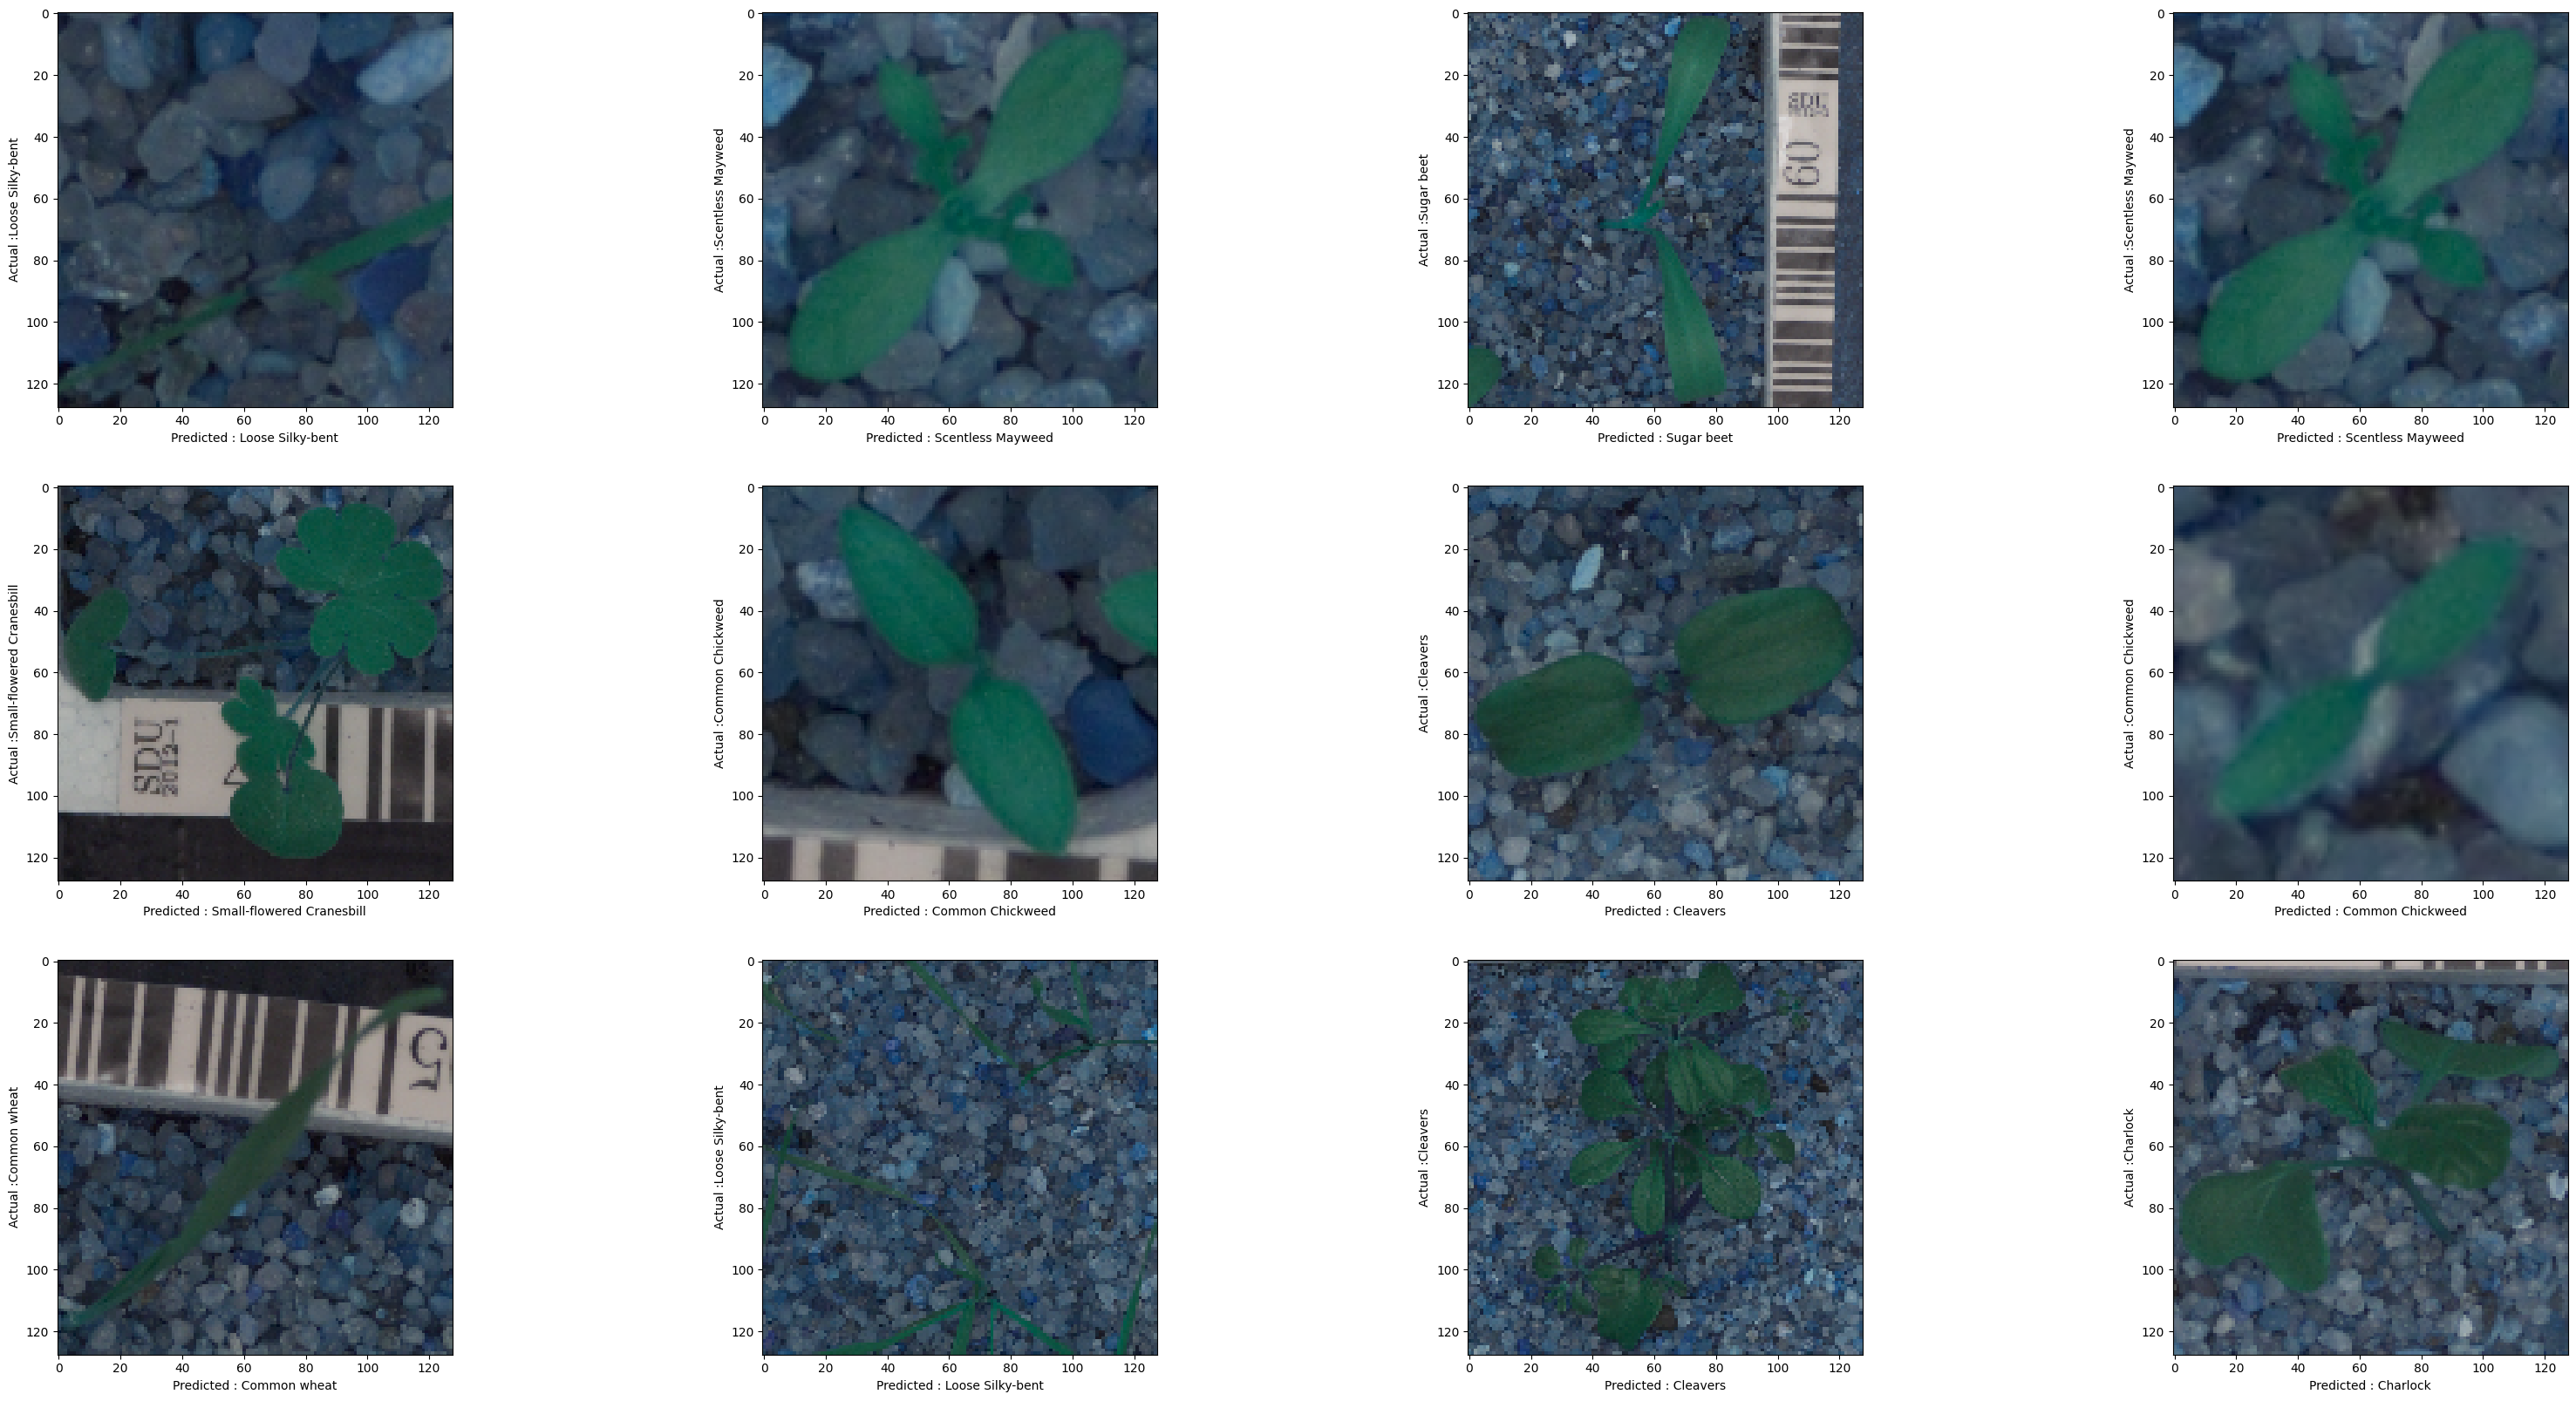

In [100]:
visualize_predicted_images(model1, X_test, X_test_normalized, y_test_encoded)

#### Model-2 Predection

15/15 [==============================] - 0s 7ms/step


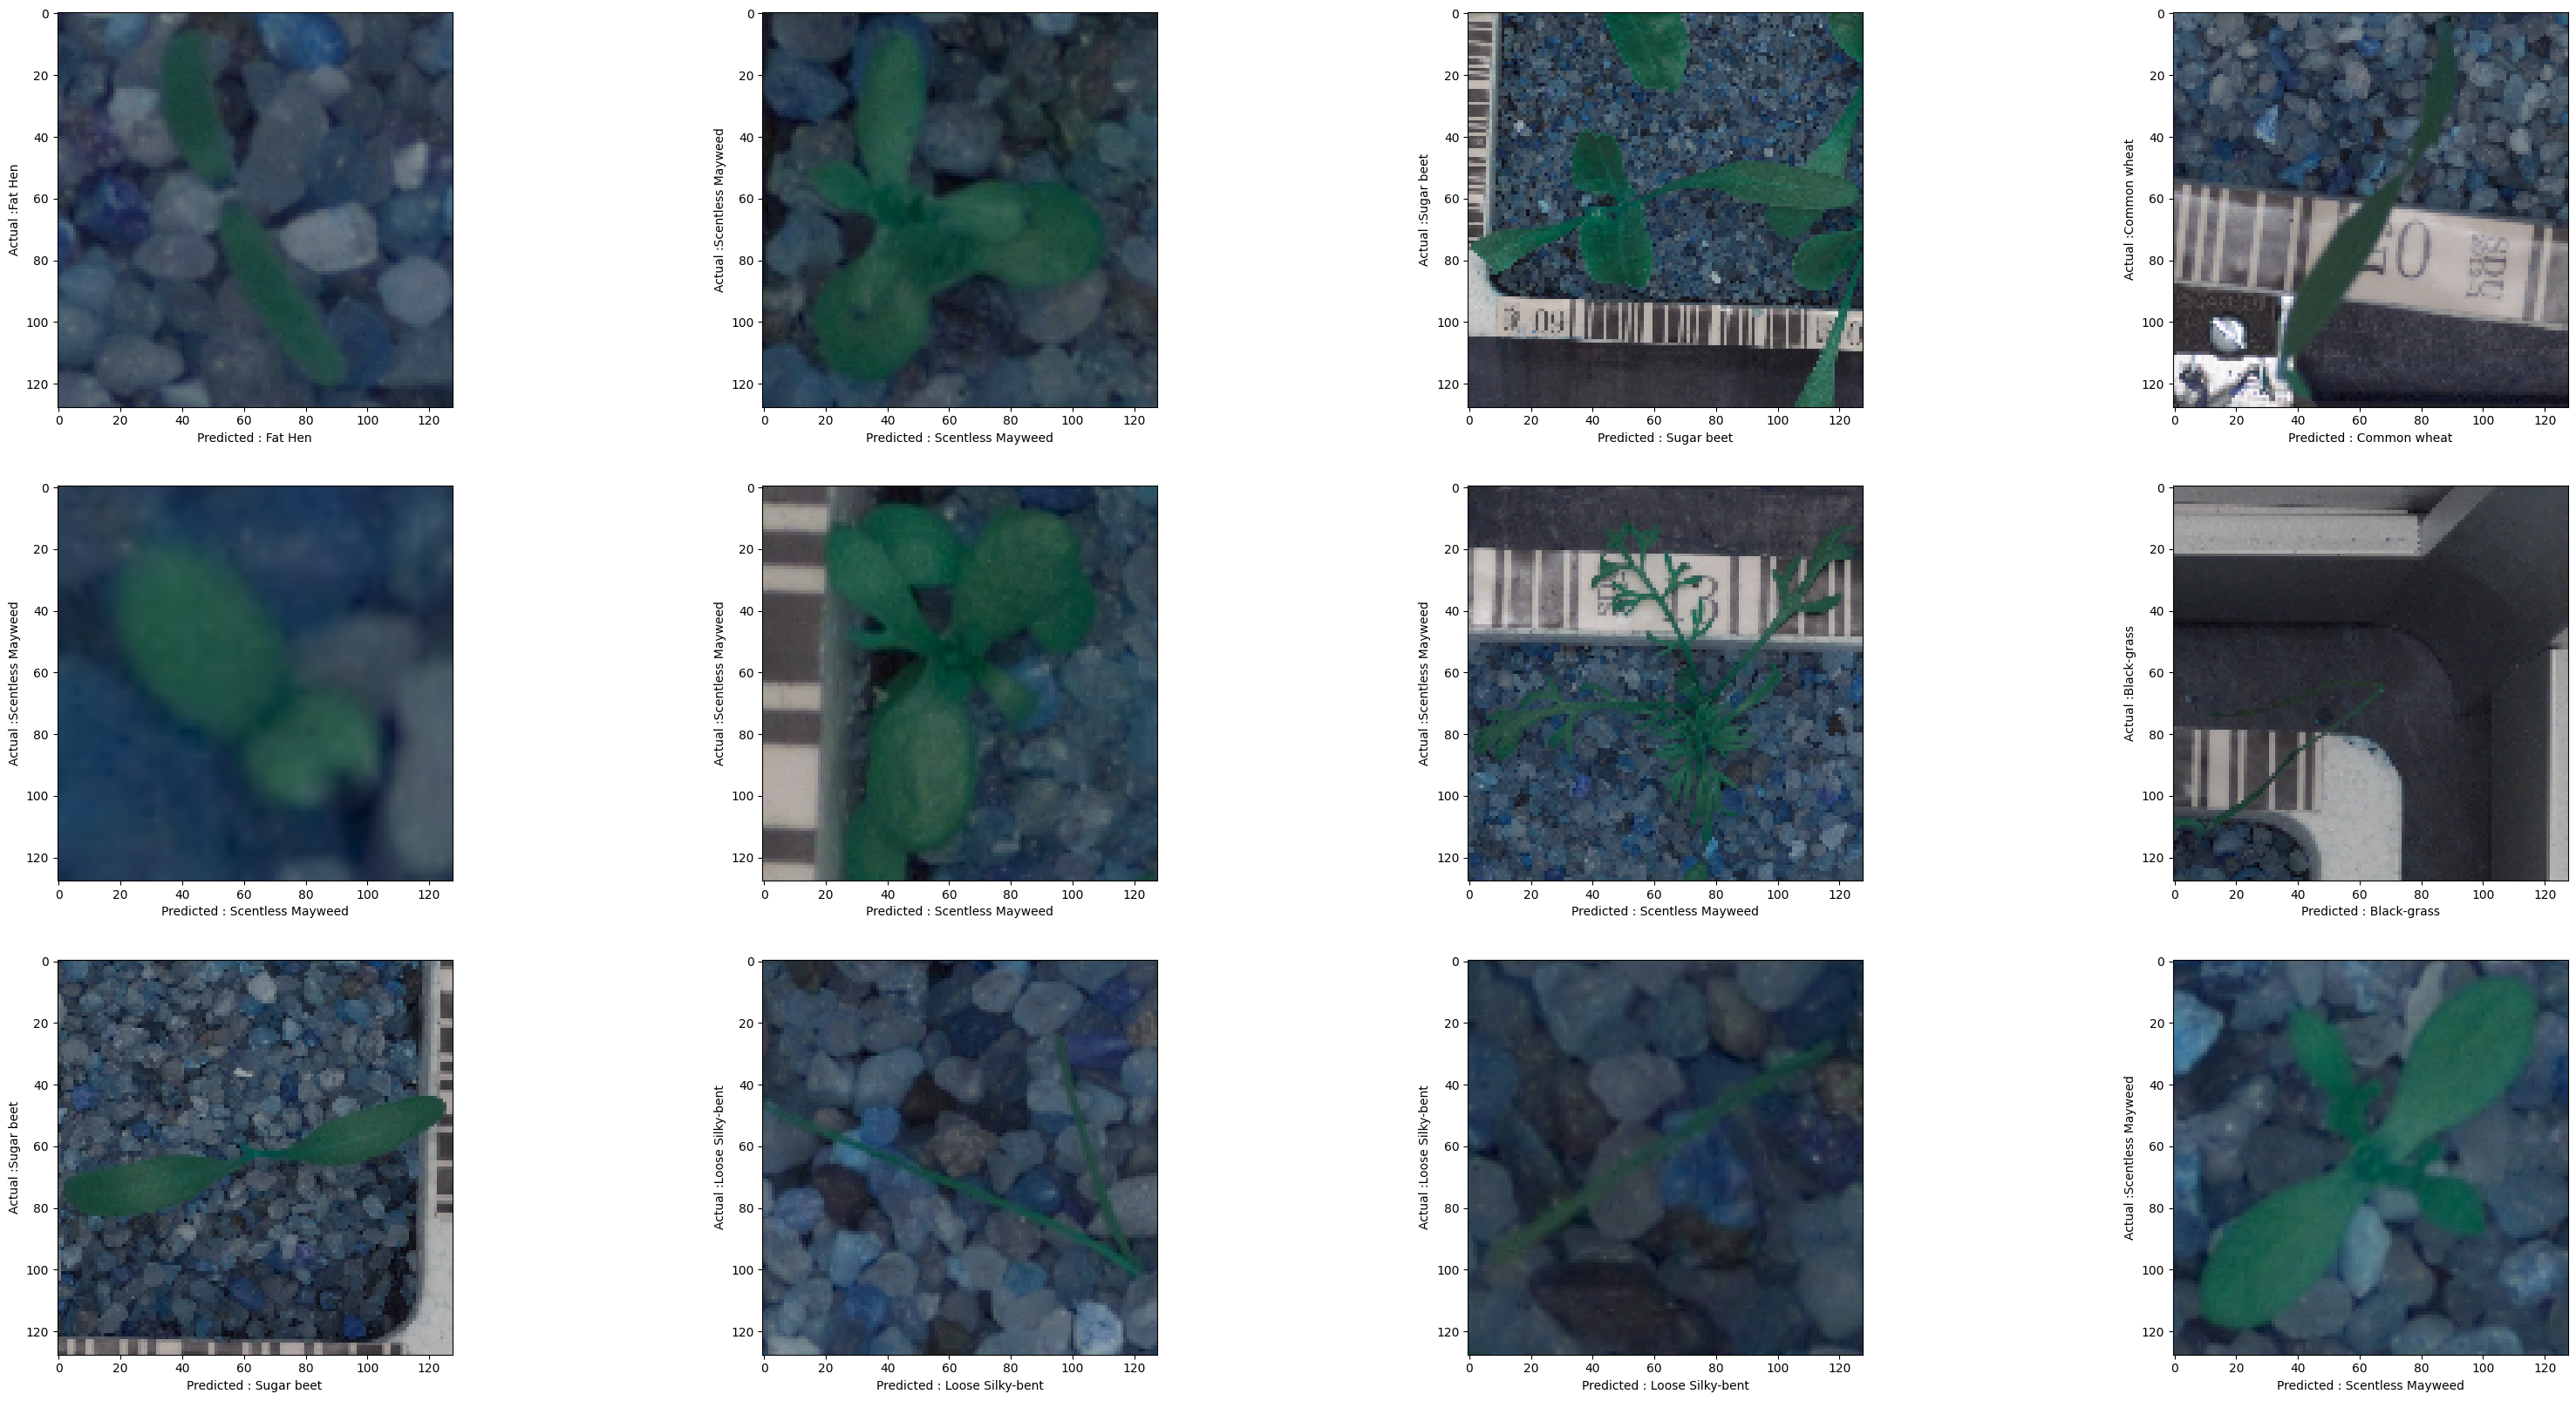

In [101]:
visualize_predicted_images(model2, X_test, X_test_normalized, y_test_encoded)

#### Model-3 Predection

15/15 [==============================] - 1s 46ms/step


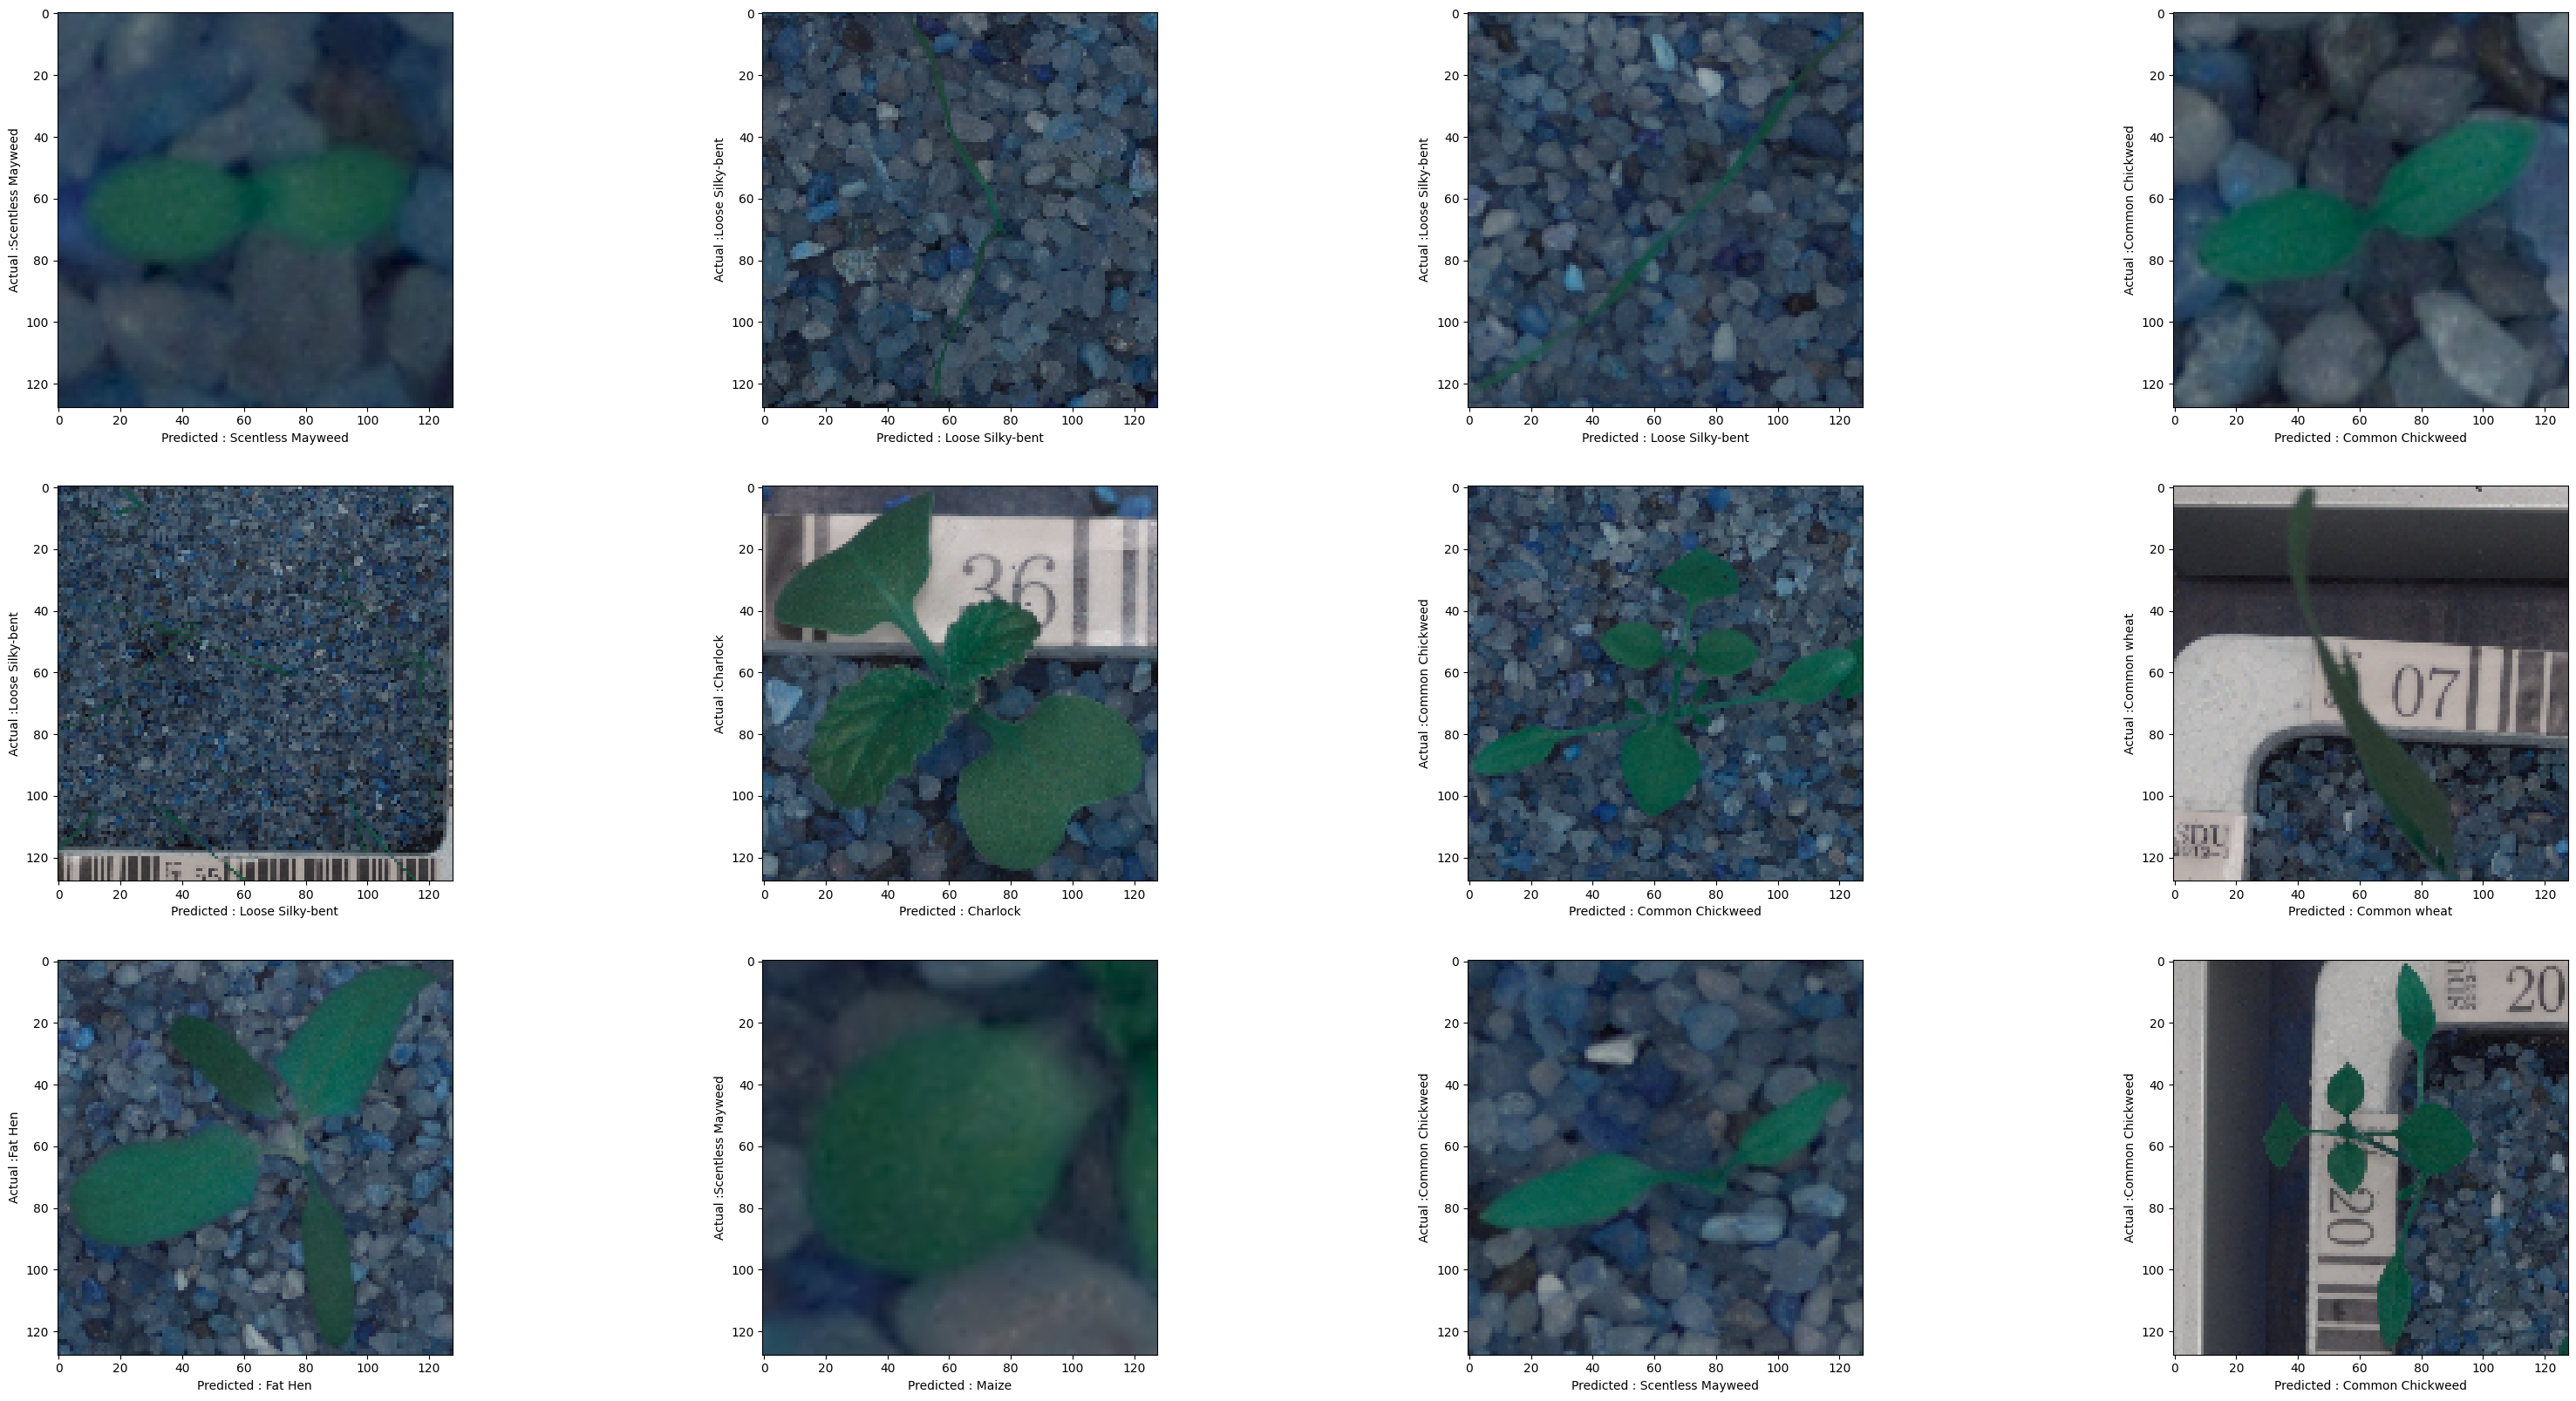

In [102]:
visualize_predicted_images(model3, X_test, X_test_normalized, y_test_encoded)

## Actionable Insights and Business Recommendations

1. As we have seen, the CNN model - 2 was able to predict the test image correctly with a test accuracy of 84%. Model-1 came to 77% and Model-3 with 72%
2. All the Models can be further fine tuned to achieve higher accuracy by adding more dense layer.
3. Early **Stopping greatly helped all the model** on accuracy, with out Early Stopping Moldes were performing poorly
3. I will stop here at 84% accuracy due to availabilitty of resources.
4. I used decreased image size for initial model building, but the predection on modified image size was below 60%. So I went ahead with origional image to create Train, Validation and Test data
4. Above models will provide better accuracy with higher resoulution images but processing it will require better infrastructure.

In [107]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/AIMLColab/Intro to Computer Vision/CNN-Project1/CV_Project_Full_Code_Notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIMLColab/Intro to Computer Vision/CNN-Project1/CV_Project_Full_Code_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 5078523 bytes to /content/drive/MyDrive/AIMLColab/Intro to Computer Vision/CNN-Project1/CV_Project_Full_Code_Notebook.html


_____